In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
data1 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions')
data2 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic')
data2

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


## Preprocessing

In [20]:
data1.columns = data1.iloc[0]
data2.columns = data2.iloc[0]
data2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [21]:
df1 = data1.iloc[1:]
df2 = data2.iloc[1:]
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


Duplicates

In [23]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0


# Null/NaN Values

In [27]:
#print(df1.isna().sum())
df11 = df1.copy()
print(df2.isna().sum())
df21 = df2.copy()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64


In [28]:
df21['last_name'] = df21['last_name'].fillna(method='ffill')
df21['DOB'] = df21['DOB'].fillna(method='ffill')
df21['job_title'] = df21['job_title'].fillna(method='ffill')
df21['job_industry_category'] = df21['job_industry_category'].fillna(method='ffill')
df21['default'] = df21['default'].fillna(method='ffill')
df21['tenure'] = df21['tenure'].fillna(method='ffill')

In [8]:
df11['online_order'] = df11['online_order'].fillna(method='ffill')
df11['brand'] = df11['brand'].fillna(method='ffill')
df11['product_line'] = df11['product_line'].fillna(method='ffill')
df11['product_class'] = df11['product_class'].fillna(method='ffill')
df11['product_size'] = df11['product_size'].fillna(method='ffill')
df11['standard_cost'] = df11['standard_cost'].fillna(method='ffill')
df11['product_first_sold_date'] = df11['product_first_sold_date'].fillna(method='ffill')

In [9]:
df11.isna().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [29]:
df21.isna().sum()

0
customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [10]:
df11.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216
20000,20000,11,1144,2017-09-22 00:00:00,True,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334


In [30]:
df21.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,2001-07-13 00:00:00,Assistant Manager,IT,High Net Worth,N,â¦testâ§,No,1
3999,3999,Patrizius,Woolley,Male,11,1973-10-24 00:00:00,Assistant Manager,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10
4000,4000,Kippy,Oldland,Male,76,1991-11-05 00:00:00,Software Engineer IV,Manufacturing,Affluent Customer,N,0/0,No,11


### Label enocding

In [11]:
lbl = LabelEncoder()
df11['trans_date'] = lbl.fit_transform(df1['transaction_date'])
df11['on_order'] = lbl.fit_transform(df1['online_order'])
df11['status'] = lbl.fit_transform(df1['order_status'])
df11['brands'] = lbl.fit_transform(df1['brand'])
df11['pro_line'] = lbl.fit_transform(df1['product_line'])
df11['pro_class'] = lbl.fit_transform(df1['product_class'])
df11['pro_size'] = lbl.fit_transform(df1['product_size'])

In [12]:
df11.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_date,on_order,status,brands,pro_line,pro_class,pro_size
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823,174,1,0,2,2,0,1
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560,312,1,0,3,1,2,1
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410,103,1,0,2,2,2,1
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,183,0,0,2,2,0,1
20000,20000,11,1144,2017-09-22 00:00:00,True,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334,264,1,0,4,2,2,2


In [13]:
df12 = df11.drop(['transaction_date','online_order','order_status','brand','product_line','product_class','product_size'],axis='columns')
df12.tail()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date,trans_date,on_order,status,brands,pro_line,pro_class,pro_size
19996,19996,51,1018,2005.66,1203.40,37823,174,1,0,2,2,0,1
19997,19997,41,127,416.98,312.74,35560,312,1,0,3,1,2,1
19998,19998,87,2284,1636.9,44.71,40410,103,1,0,2,2,2,1
19999,19999,6,2764,227.88,136.73,38216,183,0,0,2,2,0,1
20000,20000,11,1144,1775.81,1580.47,36334,264,1,0,4,2,2,2


### Finding relevant features

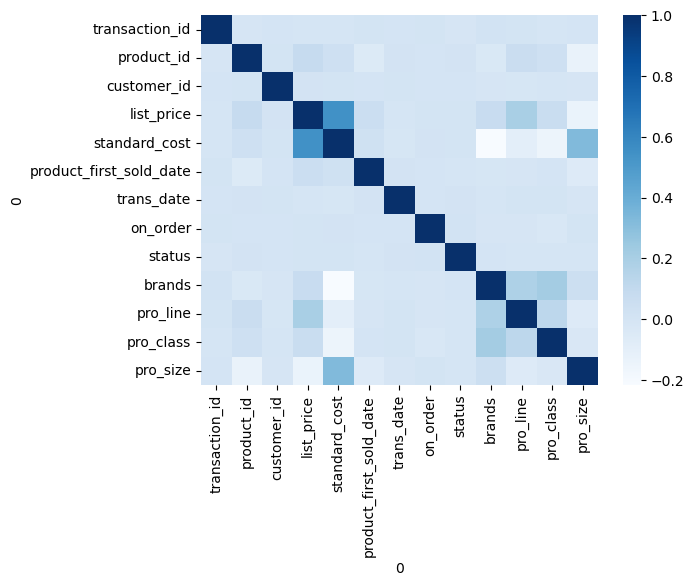

In [16]:
sns.heatmap(df12.corr(),cmap='Blues')
plt.show()

### Splitting the data